In [11]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info = True, as_supervised = True)

In [13]:
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [14]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(32)

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

In [16]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=1)

In [ ]:
model.fit(train_batches, epochs=2)

In [ ]:
files.upload()

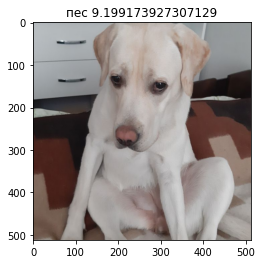

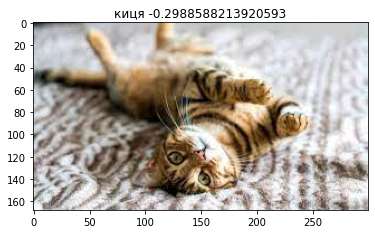

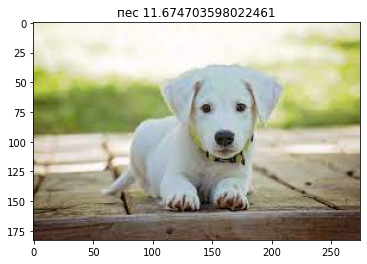

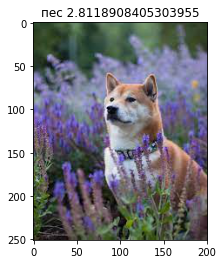

In [30]:
for i in range(4):
  img = load_img(f'{i+1}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'киця' if prediction < 0.5 else 'пес'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')